In [6]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import colors
import matplotlib.animation as animation

In [72]:
class Terrain():
    def __init__(self, n, prob_land=.4, simulations = False):
        """Creates land masses for game
        Parameters:
            n: size of output vector (nxn)
            prob_land: probability that a given tile will be land
            cell_limit: how sensitive cellular automata is
            simulations: value if defining number of simulations            
        """
        if simulations:
            self.simulations = simulations
        else:
            self.simulations = np.max([n//10, 5])
        self.n = n
        
        #initial random terrain
        self.terrain_raw = np.matrix(np.reshape(np.random.choice(2, (n)**2, p=[1-prob_land, prob_land]), (n,n)))
        
        #terrain after cellular automata with 4 like cells
        self.terrain, self.t_sims = Terrain.land_simulation(self.terrain_raw, 4, self.simulations)
    
    def land_simulation(terrain, cell_limit, simulations):
        """Simulates the cellular automata of land masses"""
        sims = list()
        for i in range(simulations):
            terrain = Terrain.cellular_automata(terrain, n, cell_limit)
            sims.append(terrain)
        return terrain, sims
    
    def assign_value(terrain, x, y, cell_limit):
        """Calculates if cell is water or land by looking at surrounding cells"""
        if x == 0:
            x = 1
        if y == 0:
            y = 1
        grid = terrain[y-1:y+2, x-1:x+2]
        #grid[1,1] = 0
        if grid.sum() <= cell_limit:
            return 0
        else:
            return 1
        
    def cellular_automata(terrain, n, cell_limit):
        """Updates the terrain of a given simulation"""
        vals = list()
        for x in range(n):
            for y in range(n):
                vals.append(Terrain.assign_value(terrain, y, x, cell_limit))
        vals_m = np.matrix(np.asarray(vals).reshape(n,n))
        return vals_m
    
    def make_gif(t):
        """Converts simulations to gif"""
        fig = plt.figure()
        ims = []
        cmap = colors.ListedColormap(['blue', 'green'])
        bounds=[0,.5,1]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        for i in range(t.simulations):
            im = plt.imshow(t.t_sims[i], interpolation='nearest', origin='lower',
                            cmap=cmap, norm=norm)
            im.axes.get_yaxis().set_visible(False)
            im.axes.get_xaxis().set_visible(False)
            ims.append([im])

        ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=0)

        ani.save('land_generation{}.gif'.format(t.n))
        plt.show()
    
    def show_img(data):
        """Shows figure"""
        cmap = colors.ListedColormap(['blue', 'green'])
        bounds=[0,.5,1]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        im = plt.imshow(data, interpolation='nearest', origin='lower',
                            cmap=cmap, norm=norm)
        im.axes.get_yaxis().set_visible(False)
        im.axes.get_xaxis().set_visible(False)
        
        plt.savefig('map{}.png'.format(data.shape[0]))


In [73]:
n = 50
t = Terrain(n, prob_land=.5)

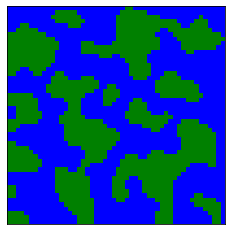

In [74]:
Terrain.show_img(t.terrain)

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


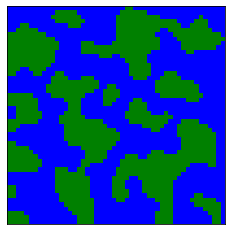

In [75]:
Terrain.make_gif(t)